In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#above are de-facto libraries for EDA

from sklearn.model_selection import train_test_split # to split the data

from sklearn.ensemble import RandomForestClassifier #tree based model


from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix # for evaluation

## Data Source: UCI ML Repository
Link : https://archive.ics.uci.edu/ml/datasets/Dry+Bean+Dataset

Desc: 
Seven different types of dry beans were used in this research, taking into account the features such as form, shape, type, and structure by the market situation. A computer vision system was developed to distinguish seven different registered varieties of dry beans with similar features in order to obtain uniform seed classification. For the classification model, images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. Bean images obtained by computer vision system were subjected to segmentation and feature extraction stages, and a total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.

The Dataset is in Excel format.

In [4]:
data = pd.read_excel("Dry_Bean_Dataset.xlsx")

# Initial EDA

In [5]:
data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [6]:
data.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

## So, We don't have any missing value.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [8]:
data['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

## A good enough distribution of data in the target column but BOMBAY might face some class imbalance issue.

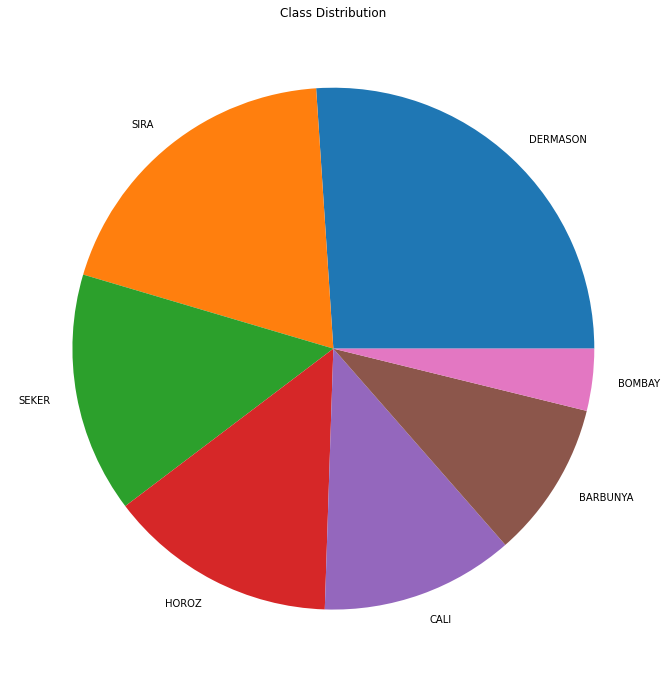

In [9]:
plt.figure(figsize=(12,12))
plt.pie(data['Class'].value_counts(), labels=data['Class'].value_counts().index)
plt.title('Class Distribution')
plt.show()

# Preprocessing

In [10]:
def preprocess_inputs_for_tree_models(df):
  df = df.copy()
  #X and y
  X = df.drop('Class', axis=1)
  y = df['Class']
  #X and y
  X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, shuffle=True, random_state=21)
  return X_train, X_test, y_train, y_test

In [11]:
X_train, X_test, y_train, y_test = preprocess_inputs_for_tree_models(data)

In [12]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

9527
4084
9527
4084


In [13]:
X_train

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
9175,46524,810.566,307.274820,194.372553,1.580855,0.774504,46926,243.384873,0.801944,0.991433,0.889836,0.792076,0.006605,0.001604,0.627384,0.991803
1491,42379,759.965,251.037567,215.217912,1.166434,0.514795,42840,232.289945,0.763586,0.989239,0.922090,0.925319,0.005924,0.002679,0.856216,0.998720
10298,25232,589.499,215.368290,149.317193,1.442354,0.720639,25550,179.238333,0.725558,0.987554,0.912421,0.832241,0.008536,0.002526,0.692625,0.999011
13164,38038,726.614,271.878044,178.597084,1.522298,0.753976,38465,220.071547,0.711682,0.988899,0.905357,0.809450,0.007148,0.001893,0.655208,0.997423
3099,78630,1108.853,412.014975,244.017736,1.688463,0.805751,79898,316.409269,0.805635,0.984130,0.803619,0.767956,0.005240,0.001124,0.589756,0.995781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9336,47323,817.383,309.619288,195.605002,1.582880,0.775164,47767,245.465914,0.805470,0.990705,0.890084,0.792799,0.006543,0.001594,0.628531,0.994889
48,32233,665.493,221.233684,185.592373,1.192041,0.544290,32710,202.584131,0.775204,0.985417,0.914584,0.915702,0.006864,0.002977,0.838510,0.999538
8964,45550,797.549,296.932493,196.391957,1.511938,0.750031,46093,240.823714,0.775662,0.988219,0.899878,0.811039,0.006519,0.001740,0.657784,0.994528
5944,48423,858.834,351.444780,176.193692,1.994650,0.865250,49003,248.302393,0.731476,0.988164,0.824979,0.706519,0.007258,0.001116,0.499169,0.995668


In [14]:
y_test

12172    DERMASON
3690       BOMBAY
8739         SIRA
10715    DERMASON
3291     BARBUNYA
           ...   
3058     BARBUNYA
9369         SIRA
39          SEKER
2931     BARBUNYA
6954        HOROZ
Name: Class, Length: 4084, dtype: object

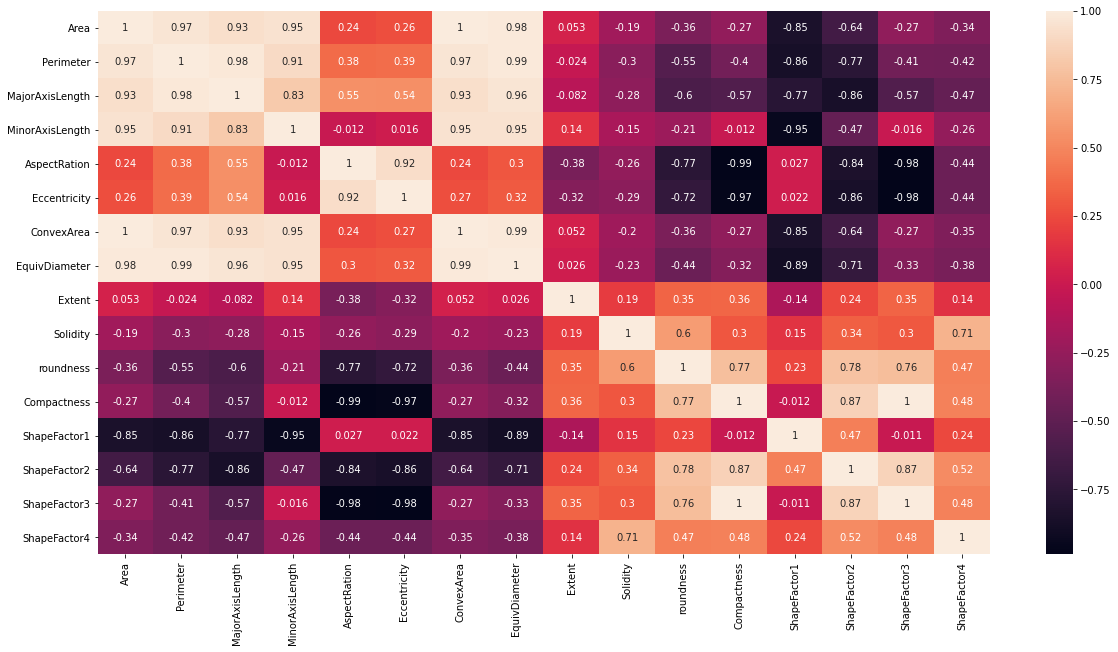

In [62]:
plt.figure(figsize=(20,10))
sns.heatmap(X_train.corr(), annot=True)
plt.show()

#Model Training

In [15]:
random_forest_clf = RandomForestClassifier()
random_forest_model = random_forest_clf.fit(X_train, y_train)

In [16]:
print(random_forest_model)

RandomForestClassifier()


# Model Evaluation

In [17]:
random_forest_model_accuracy = random_forest_model.score(X_test, y_test)
print("Accuracy for Random Forest Classifier is: ", np.round(random_forest_model_accuracy*100, 2), '%')

Accuracy for Random Forest Classifier is:  92.14 %


In [18]:
y_pred = random_forest_model.predict(X_test)
pd.DataFrame(y_pred)

,0
0,DERMASON
1,BOMBAY
2,SIRA
3,DERMASON
4,BARBUNYA
...,...
4079,BARBUNYA
4080,HOROZ
4081,SEKER
4082,BARBUNYA


In [19]:
clf_random_forest_model = classification_report(y_test, y_pred)
print(clf_random_forest_model)

              precision    recall  f1-score   support

    BARBUNYA       0.95      0.90      0.93       395
      BOMBAY       1.00      1.00      1.00       163
        CALI       0.93      0.95      0.94       499
    DERMASON       0.91      0.92      0.91      1053
       HOROZ       0.96      0.95      0.95       585
       SEKER       0.94      0.95      0.94       639
        SIRA       0.86      0.85      0.86       750

    accuracy                           0.92      4084
   macro avg       0.93      0.93      0.93      4084
weighted avg       0.92      0.92      0.92      4084



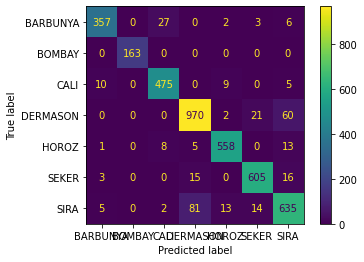

In [20]:
plot_confusion_matrix(random_forest_model, X_test, y_test, labels=random_forest_model.classes_)

In [21]:
confusion_matrix(y_test, y_pred)

array([[357,   0,  27,   0,   2,   3,   6],
       [  0, 163,   0,   0,   0,   0,   0],
       [ 10,   0, 475,   0,   9,   0,   5],
       [  0,   0,   0, 970,   2,  21,  60],
       [  1,   0,   8,   5, 558,   0,  13],
       [  3,   0,   0,  15,   0, 605,  16],
       [  5,   0,   2,  81,  13,  14, 635]])

# Narration from Random Forest Classification:
- Very good performance. There are few mislabled result but it is a very good result so far without any hyperparameters tuning.

# FINDING THE FEATURE IMPACT ON THE MODEL'S PERFORMANCE 
- SHAP is very powerful package to explain the impact of features using "Tree-based Models".
- Let's use "SHAP VALUES" to find it out.

In [22]:
import shap

In [27]:
X_test.iloc[[20]]

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
1786,45646,771.593,274.635537,211.90245,1.296047,0.636136,45953,241.077357,0.779274,0.993319,0.963465,0.877808,0.006017,0.002204,0.770547,0.998666


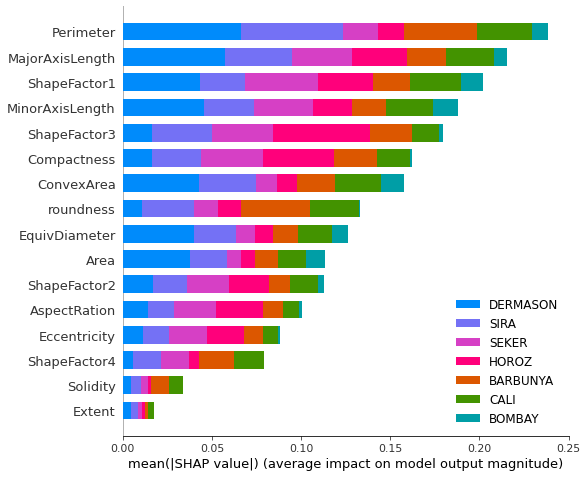

<Figure size 432x288 with 0 Axes>

In [63]:
# Calculate Shap values
explainer_random_forest = shap.TreeExplainer(random_forest_model)
shap_values_random_forest = explainer_random_forest.shap_values(X_test)
shap.initjs()
shap.summary_plot(shap_values_random_forest, X_test, class_names=random_forest_model.classes_)

## We can see "Perimeter", "MajoxAxisLength" etc has more impact on the prediction of the classes.

#### A Single explanation

In [29]:
explainer_random_forest = shap.TreeExplainer(random_forest_model)
choosen_instance = X_test.iloc[[20]]
shap_values = explainer_random_forest.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer_random_forest.expected_value[1], shap_values[1], choosen_instance)

# Tuning Random Forest:
+ n_estimators = n of trees
+ max_features = max number of features considered for splitting a node
+ max_depth = max number of levels in each decision tree
+ min_samples_split = min number of data points placed in a node before the node is split
+ min_samples_leaf = min number of data points allowed in a leaf node
+ bootstrap = method for sampling data points (with or without replacement)

In [36]:
from sklearn.model_selection import GridSearchCV

param_grid = [
{'n_estimators': [10, 25], 'max_features': [5, 10], 
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

grid_search_forest_model = GridSearchCV(random_forest_model, param_grid, cv=10)
grid_search_forest_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'bootstrap': [True, False],
                          'max_depth': [10, 50, None], 'max_features': [5, 10],
                          'n_estimators': [10, 25]}])

In [37]:
grid_search_forest_model.best_estimator_

RandomForestClassifier(max_features=10, n_estimators=25)

In [43]:
print("Accuracy after tuning is: ",np.round(grid_search_forest_model.score(X_test, y_test), 2), "%")

Accuracy after tuning is:  0.93 %


## Saving the model using Pickle

In [53]:
import pickle

In [55]:
pickle.dump(random_forest_model, open("dry_bean_model.pkl", "wb"))